In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

I referred [here](https://archive.ics.uci.edu/ml/datasets/Madelon) to the description of the original synthetic dataset.

    Abstract: MADELON is an artificial dataset, which was part of the NIPS 2003 feature selection challenge. This is a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear.
    
![](https://archive.ics.uci.edu/ml/assets/MLimages/Large171.jpg)

    make_classification(n_samples=4400, n_features=500, n_informative=5, n_redundant=15, n_repeated=0, n_classes=2, n_clusters_per_class=15, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

### Data Set Information:

    MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized. 

Of particular importance here is the number of clusters positioned at the vertices of the hypercube. 

### Function to Generate the Original Data

In [2]:
X, y = make_classification(n_samples=4400,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2, 
                           n_clusters_per_class=2, 
                           class_sep=3.0)

In [3]:
X[:,0].shape

(4400,)

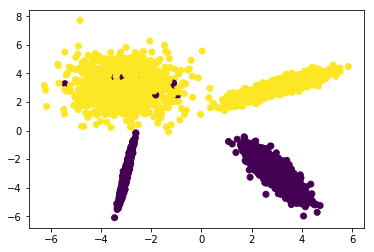

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

We run the IPython magic `%whos` to ascertain the data footprint.

In [7]:
%whos

Variable              Type        Data/Info
-------------------------------------------
X                     ndarray     4400x2: 8800 elems, type `float64`, 70400 bytes
make_classification   function    <function make_classification at 0x7f21c591c6a8>
plt                   module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
y                     ndarray     4400: 4400 elems, type `int64`, 35200 bytes


Note that the `X` array takes up 16.8 Mb of data. One goal of this project is to require students to deal with engineering constraints. A dataset that takes up more than 1GB of memory will not fit on an AWS `t2.micro`.

### Examining the clusters on the Hypercube

We look at the clustering on the hypercube by reducing the size of the data and the number of features. 

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from sklearn.decomposition import PCA

In [11]:
X, y = make_classification(n_samples=200,
                           n_features=4, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           class_sep=1,
                           random_state=10)

We perform a principal component analysis on this data in order to plot the data.

In [12]:
pca = PCA(2)
X_pc = pca.fit_transform(X)

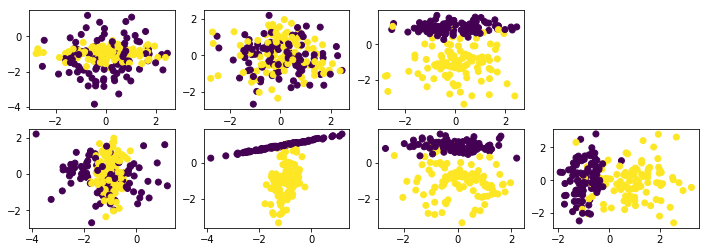

In [13]:
fig = plt.figure(figsize=(12,4))
fig.add_subplot(2,4,1)
plt.scatter(X[:,0],X[:,1], c=y)
fig.add_subplot(2,4,2)
plt.scatter(X[:,0],X[:,2], c=y)
fig.add_subplot(2,4,3)
plt.scatter(X[:,0],X[:,3], c=y)
fig.add_subplot(2,4,5)
plt.scatter(X[:,1],X[:,2], c=y)
fig.add_subplot(2,4,6)
plt.scatter(X[:,1],X[:,3], c=y)
fig.add_subplot(2,4,7)
plt.scatter(X[:,2],X[:,3], c=y)
fig.add_subplot(2,4,8)
plt.scatter(X_pc[:,0],X_pc[:,1], c=y)

From the plots, it appears that

In [14]:
pca.explained_variance_

array([ 1.44530077,  1.10231495])

In [15]:
pca.components_

array([[ 0.00360877, -0.07769986,  0.2558412 , -0.96358445],
       [-0.97567524, -0.10010356,  0.18735904,  0.05416361]])

This shows that for this particular dataset, features 0 and 3 are the important features. 